In [1]:
import pandas as pd
import shutil
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tqdm import tqdm, tqdm_notebook
import glob
from PIL import Image
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from joblib import Parallel, delayed

In [3]:
# os.system("mv data/train data/orig_train")
# os.system("mv data/test data/orig_test")

In [31]:
df = pd.read_csv("train.csv")

In [32]:
# seq_split = df.drop_duplicates("seq", keep="first")
# train, test = train_test_split(seq_split, stratify=seq_split["label"], test_size = 0.10, random_state=1)

In [33]:
# train = df[df["seq"].isin(train["seq"])]
# test = df[df["seq"].isin(test["seq"])]

In [38]:
# train["label"].value_counts()

In [39]:
# test["label"].value_counts()

In [40]:
name_p = "original/patch3_"
os.makedirs("data/"+name_p+"train/0", exist_ok=True)
os.makedirs("data/"+name_p+"train/1", exist_ok=True)
os.makedirs("data/"+name_p+"test/0", exist_ok=True)
os.makedirs("data/"+name_p+"test/1", exist_ok=True)

# os.makedirs("data/"+name_p+"test/0", exist_ok=True)
# os.makedirs("data/"+name_p+"test/1", exist_ok=True)

In [36]:
for x in tqdm(train.iterrows()):
    nm = str(x[1]["name"])
    shutil.copy("data/original/all/"+nm, "data/original/vanilla/train/"+str(x[1]["label"])+"/"+nm)

5799it [00:07, 786.70it/s]


In [37]:
for x in tqdm(test.iterrows()):
    nm = str(x[1]["name"])
    shutil.copy("data/original/all/"+nm, "data/original/vanilla/val/"+str(x[1]["label"])+"/"+nm)

662it [00:01, 564.93it/s]


In [3]:
original = glob.glob("data/original/train/0/*") + glob.glob("data/original/test/0/*")

In [100]:
len(train_img) * 6

14880

In [95]:
st_0 = glob.glob("data/original/stylegan_0/*")

In [96]:
len(st_0)

14880

### Patch 3 - middle - GAN

In [3]:
train_img = glob.glob("data/original/train/0/*") + glob.glob("data/original/test/0/*")
width, height = Image.open(train_img[0]).size
new_width = height
new_height = height
left = (width - new_width)/2
top = (height - new_height)/2
right = (width + new_width)/2
bottom = (height + new_height)/2
name_p = "patch3"

In [92]:
def process(img):
    image = Image.open(img)
    
    img = img.split("/")[-1]
    
    img1 = image.crop((60, 0, height+60, height)).resize((256,256))
    img2 = image.crop((left, top, right, bottom)).resize((256,256))
    img3 = image.crop((width-height-60, 0, width-60, height)).resize((256,256))
    
    img1.save("data/original/stylegan_0/p1_1_"+img)
    img2.save("data/original/stylegan_0/p2_1_"+img)
    img3.save("data/original/stylegan_0/p3_1_"+img)
    
    img1.transpose(Image.FLIP_TOP_BOTTOM).save("data/original/stylegan_0/p1_1_"+img)
    img1.transpose(Image.FLIP_LEFT_RIGHT).save("data/original/stylegan_0/p1_2_"+img)

    img2.transpose(Image.FLIP_TOP_BOTTOM).save("data/original/stylegan_0/p2_1_"+img)
    img2.transpose(Image.FLIP_LEFT_RIGHT).save("data/original/stylegan_0/p2_2_"+img)

    img3.transpose(Image.FLIP_TOP_BOTTOM).save("data/original/stylegan_0/p3_1_"+img)
    img3.transpose(Image.FLIP_LEFT_RIGHT).save("data/original/stylegan_0/p3_2_"+img)

In [105]:
results = Parallel(n_jobs=30)(delayed(process)(x) for x in tqdm(train_img))

In [89]:
random.randint(0,1) == 1

False

## Patch 3

In [6]:
train_img = glob.glob("data/train/*/*") + glob.glob("data/val/*/*")
width, height = Image.open(train_img[0]).size
new_width = height
new_height = height
left = (width - new_width)/2
top = (height - new_height)/2
right = (width + new_width)/2
bottom = (height + new_height)/2
name_p = "patch3"

In [71]:
for img in tqdm(train_img[40:]):
    image = Image.open(img)
    
    img1 = image.crop((0, 0, height, height))
    img2 = image.crop((width-height, 0, width, height))
    img3 = image.crop((left, top, right, bottom))
    
    break
    meta = img.split("/")
    
    img1.save("data/"+name_p+"_"+meta[1]+"/"+meta[2]+"/p1_"+meta[3])
    img2.save("data/"+name_p+"_"+meta[1]+"/"+meta[2]+"/p2_"+meta[3])
    img3.save("data/"+name_p+"_"+meta[1]+"/"+meta[2]+"/p3_"+meta[3])

  0%|          | 0/5389 [00:00<?, ?it/s]


In [104]:
# image

In [101]:
# img1

In [102]:
# img2

In [103]:
# img3

# Patch 9 

In [45]:
train_img = glob.glob("data/train/*/*") + glob.glob("data/val/*/*")
width, height = Image.open(train_img[0]).size
square = 230
name_p = "patch9"

In [96]:
for img in tqdm(train_img):
    image = Image.open(img)
    meta = img.split("/")
    
    img1 = Image.open(train_img[0]).crop((0,0,230,230))
    
    square = 230
    left = square
    top = 0
    right = left + square
    bottom = top + square
    img2 = Image.open(train_img[0]).crop((left, top, right, bottom))
    
    square = 230
    left = square*2
    top = 0
    right = left + square
    bottom = top + square
    img3 = Image.open(train_img[0]).crop((left, top, right, bottom))
    
    square = 230
    left = 0
    top = height - square
    right = left + square
    bottom = top + square
    img4 = Image.open(train_img[0]).crop((left, top, right, bottom))
    
    square = 230
    left = square
    top = height - square
    right = left + square
    bottom = top + square
    img5 = Image.open(train_img[0]).crop((left, top, right, bottom))
    
    square = 230
    left = square*2
    top = height - square
    right = left + square
    bottom = top + square
    img6 = Image.open(train_img[0]).crop((left, top, right, bottom))
    
    square = 230
    left = 0 + (square/2)
    top = 0 + (square/2)
    right = left + square
    bottom = top + square
    img7 = Image.open(train_img[0]).crop((left, top, right, bottom))
    
    square = 230
    left = 0 + (square/2) + square
    top = 0 + (square/2)
    right = left + square
    bottom = top + square
    img8 = Image.open(train_img[0]).crop((left, top, right, bottom))
    
    square = 230
    left = (width - square)/2
    top = (height - square)/2
    right = (width + square)/2
    bottom = (height + square)/2

    img9 = Image.open(train_img[0]).crop((left, top, right, bottom))
    
    img1.save("data/"+name_p+"_"+meta[1]+"/"+meta[2]+"/p1_"+meta[3])
    img2.save("data/"+name_p+"_"+meta[1]+"/"+meta[2]+"/p2_"+meta[3])
    img3.save("data/"+name_p+"_"+meta[1]+"/"+meta[2]+"/p3_"+meta[3])
    img4.save("data/"+name_p+"_"+meta[1]+"/"+meta[2]+"/p4_"+meta[3])
    img5.save("data/"+name_p+"_"+meta[1]+"/"+meta[2]+"/p5_"+meta[3])
    img6.save("data/"+name_p+"_"+meta[1]+"/"+meta[2]+"/p6_"+meta[3])
    img7.save("data/"+name_p+"_"+meta[1]+"/"+meta[2]+"/p7_"+meta[3])
    img8.save("data/"+name_p+"_"+meta[1]+"/"+meta[2]+"/p8_"+meta[3])
    img9.save("data/"+name_p+"_"+meta[1]+"/"+meta[2]+"/p9_"+meta[3])

100%|██████████| 6461/6461 [46:56<00:00,  2.43it/s]


## Random Patch 5 on malignant

In [176]:
train_img = [(x[1]["name"], x[1]["label"], "train") for x in train.iterrows()]
train_img = train_img + [(x[1]["name"], x[1]["label"], "val") for x in test.iterrows()]

In [177]:
name_p="normalize/patch5"
width, height = Image.open("data/normalize/all/"+train_img[0][0]).size
square = 230

In [178]:
for img in tqdm(train_img):
    image = Image.open("data/normalize/all/"+img[0])
    meta = ["",str(img[2]), str(img[1]), img[0]]
    
    square = 230
    left = square + (square/2)
    top = 0 
    right = left + square
    bottom = top + square
    
    if img[1] == 1 and random.randint(0,1) == 1:
        img1 = image.crop((left, top, right, bottom))
        img1.save("data/"+name_p+"_"+meta[1]+"/"+meta[2]+"/p1_"+meta[3])
    if img[1] == 0:
        img1 = image.crop((left, top, right, bottom))
        img1.save("data/"+name_p+"_"+meta[1]+"/"+meta[2]+"/p1_"+meta[3])
    
    square = 230
    left = 0 + (square/2)
    top = 0 
    right = left + square
    bottom = top + square
    
    if img[1] == 1 and random.randint(0,1) == 1:
        img2 = image.crop((left, top, right, bottom))
        img2.save("data/"+name_p+"_"+meta[1]+"/"+meta[2]+"/p2_"+meta[3])
    if img[1] == 0:
        img2 = image.crop((left, top, right, bottom))
        img2.save("data/"+name_p+"_"+meta[1]+"/"+meta[2]+"/p2_"+meta[3])
    
    square = 230
    left = 0 + (square/2)
    top = 230 
    right = left + square
    bottom = top + square
    
    if img[1] == 1 and random.randint(0,1) == 1:
        img3 = image.crop((left, top, right, bottom))
        img3.save("data/"+name_p+"_"+meta[1]+"/"+meta[2]+"/p3_"+meta[3])
    if img[1] == 0:
        img3 = image.crop((left, top, right, bottom))
        img3.save("data/"+name_p+"_"+meta[1]+"/"+meta[2]+"/p3_"+meta[3])
    
    square = 230
    left = square + (square/2)
    top = 230 
    right = left + square
    bottom = top + square
    
    if img[1] == 1 and random.randint(0,1) == 1:
        img4 = image.crop((left, top, right, bottom))
        img4.save("data/"+name_p+"_"+meta[1]+"/"+meta[2]+"/p4_"+meta[3])
    if img[1] == 0:
        img4 = image.crop((left, top, right, bottom))
        img4.save("data/"+name_p+"_"+meta[1]+"/"+meta[2]+"/p4_"+meta[3])
        
    
    square = 230
    left = (width - square)/2
    top = (height - square)/2
    right = (width + square)/2
    bottom = (height + square)/2
    
    if img[1] == 1 and random.randint(0,1) == 1:
        img5 = image.crop((left, top, right, bottom))
        img5.save("data/"+name_p+"_"+meta[1]+"/"+meta[2]+"/p5_"+meta[3])
    if img[1] == 0:
        img5 = image.crop((left, top, right, bottom))
        img5.save("data/"+name_p+"_"+meta[1]+"/"+meta[2]+"/p5_"+meta[3])

100%|██████████| 6461/6461 [06:43<00:00, 16.00it/s]


In [179]:
len(glob.glob("data/normalize/patch5_train/1/*"))

10212

In [180]:
len(glob.glob("data/normalize/patch5_train/0/*"))

8650

In [137]:
4900*5

24500

## Patch5

In [79]:
train_img = glob.glob("data/train/*/*") + glob.glob("data/val/*/*")
width, height = Image.open(train_img[0]).size
square = 230
name_p = "patch5"

In [83]:
for img in tqdm(train_img):
    image = Image.open(img)
    meta = img.split("/")
    
    square = 230
    left = square + (square/2)
    top = 0 
    right = left + square
    bottom = top + square
    img1 = image.crop((left, top, right, bottom))
    
    square = 230
    left = 0 + (square/2)
    top = 0 
    right = left + square
    bottom = top + square
    img2 = image.crop((left, top, right, bottom))
    
    square = 230
    left = 0 + (square/2)
    top = 230 
    right = left + square
    bottom = top + square
    img3 = image.crop((left, top, right, bottom))
    
    square = 230
    left = square + (square/2)
    top = 230 
    right = left + square
    bottom = top + square
    img4 = image.crop((left, top, right, bottom))
    
    square = 230
    left = (width - square)/2
    top = (height - square)/2
    right = (width + square)/2
    bottom = (height + square)/2

    img5 = image.crop((left, top, right, bottom))
    
    img1.save("data/"+name_p+"_"+meta[1]+"/"+meta[2]+"/p1_"+meta[3])
    img2.save("data/"+name_p+"_"+meta[1]+"/"+meta[2]+"/p2_"+meta[3])
    img3.save("data/"+name_p+"_"+meta[1]+"/"+meta[2]+"/p3_"+meta[3])
    img4.save("data/"+name_p+"_"+meta[1]+"/"+meta[2]+"/p4_"+meta[3])
    img5.save("data/"+name_p+"_"+meta[1]+"/"+meta[2]+"/p5_"+meta[3])

100%|██████████| 6461/6461 [10:26<00:00, 11.53it/s]


  0%|          | 0/32287 [00:00<?, ?it/s]

[196.55302457 155.75627599 187.18170132]


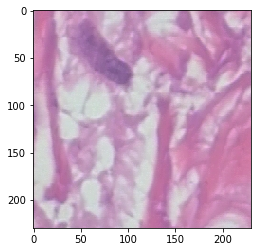

In [117]:
train_img = glob.glob("data/patch5_train/*/*") + glob.glob("data/patch5_val/*/*")
for img in tqdm(train_img[18:]):
    image = Image.open(img)
    
    average = np.array(image).mean(axis=0).mean(axis=0)
    print(average)
    plt.imshow(image)
    plt.show()
    
    pixels = np.float32(np.array(image).reshape(-1, 3))

    n_colors = 5
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
    flags = cv2.KMEANS_RANDOM_CENTERS

    _, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
    _, counts = np.unique(labels, return_counts=True)
    
    dominant = palette[np.argmax(counts)]
    
    break

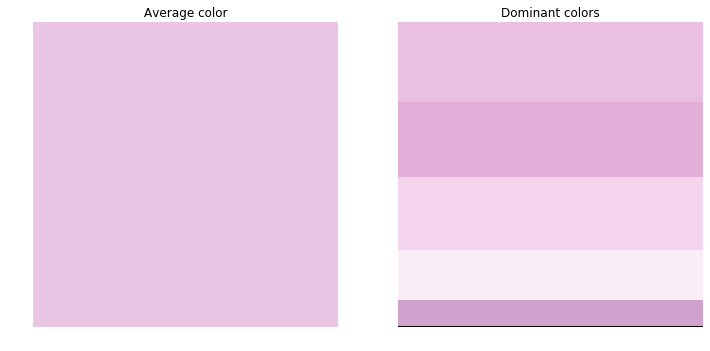

In [114]:
import matplotlib.pyplot as plt

avg_patch = np.ones(shape=np.array(image).shape, dtype=np.uint8)*np.uint8(average)

indices = np.argsort(counts)[::-1]   
freqs = np.cumsum(np.hstack([[0], counts[indices]/counts.sum()]))
rows = np.int_(np.array(image).shape[0]*freqs)

dom_patch = np.zeros(shape=np.array(image).shape, dtype=np.uint8)
for i in range(len(rows) - 1):
    dom_patch[rows[i]:rows[i + 1], :, :] += np.uint8(palette[indices[i]])

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,6))
ax0.imshow(avg_patch)
ax0.set_title('Average color')
ax0.axis('off')
ax1.imshow(dom_patch)
ax1.set_title('Dominant colors')
ax1.axis('off')
plt.show(fig)

## Patch5 - GAB

In [28]:
df = pd.read_csv("train.csv").append(pd.read_csv("test.csv"))
malign = df[df["label"] == 0]
list_name = list(malign["name"])
width, height = Image.open("data/normalize/all/"+list_name[0]).size
square = 256

In [29]:
for img in tqdm(list_name):
    image = Image.open("data/normalize/all/"+img)
    
    left = square + (square/2)
    top = 0 
    right = left + square
    bottom = top + square
    img1 = image.crop((left, top, right, bottom))
    
    left = 0 + (square/2)
    top = 0 
    right = left + square
    bottom = top + square
    img2 = image.crop((left, top, right, bottom))
    
    left = 0 + (square/2)
    top = 460-256 
    right = left + square
    bottom = top + square
    img3 = image.crop((left, top, right, bottom))
    
    left = square + (square/2)
    top = 460-256 
    right = left + square
    bottom = top + square
    img4 = image.crop((left, top, right, bottom))
    
    left = (width - square)/2
    top = (height - square)/2
    right = (width + square)/2
    bottom = (height + square)/2
    img5 = image.crop((left, top, right, bottom))
    
    img1.save("data/normalize/gan_0/p1_"+img)
    img2.save("data/normalize/gan_0/p2_"+img)
    img3.save("data/normalize/gan_0/p3_"+img)
    img4.save("data/normalize/gan_0/p4_"+img)
    img5.save("data/normalize/gan_0/p5_"+img)

100%|██████████| 2480/2480 [04:42<00:00, 10.81it/s]


## Patch 3 - StyleGAN

In [112]:
df = pd.read_csv("train.csv").append(pd.read_csv("test.csv"))
malign = df[df["label"] == 1]
list_name = list(malign["name"])
list_rows = [ row for row in malign.iterrows()]
width, height = Image.open("data/original/all/"+list_name[0]).size
square = 460

left = (width - square)/2
top = (height - square)/2
right = (width + square)/2
bottom = (height + square)/2

In [113]:
malign["zoom"].value_counts()

100X    1437
200X    1390
40X     1370
400X    1232
Name: zoom, dtype: int64

In [114]:
malign["type"].value_counts()

ductal_carcinoma       3451
mucinous_carcinoma      792
lobular_carcinoma       626
papillary_carcinoma     560
Name: type, dtype: int64

In [138]:
def processGan(row):
    img = row[1]["name"]
    image = Image.open("data/original/all/"+img)
    
    img1 = image.crop((10, 0, height+10, height)).resize((256,256))
    img2 = image.crop((left, top, right, bottom)).resize((256,256))
    img3 = image.crop((width-height-10, 0, width-10, height)).resize((256,256))
    
    img1.save("data/original/stylegan_1/p1_"+img)
    img2.save("data/original/stylegan_1/p2_"+img)
    img3.save("data/original/stylegan_1/p3_"+img)
    
    if row[1]["type"] == "ductal_carcinoma":
        if random.randint(0,2) == 1:
            if random.randint(0,1) == 1:
                img1.transpose(Image.FLIP_TOP_BOTTOM).save("data/original/stylegan_1/p1_1_"+img)
            if random.randint(0,1) == 1:
                img1.transpose(Image.FLIP_LEFT_RIGHT).save("data/original/stylegan_1/p1_2_"+img)
                
#             if random.randint(0,1) == 1:
            img2.transpose(Image.FLIP_TOP_BOTTOM).save("data/original/stylegan_1/p2_1_"+img)
#             if random.randint(0,1) == 1:
            img2.transpose(Image.FLIP_LEFT_RIGHT).save("data/original/stylegan_1/p2_2_"+img)
                
            if random.randint(0,1) == 1:
                img3.transpose(Image.FLIP_TOP_BOTTOM).save("data/original/stylegan_1/p3_1_"+img)
            if random.randint(0,1) == 1:
                img3.transpose(Image.FLIP_LEFT_RIGHT).save("data/original/stylegan_1/p3_2_"+img)
    else:
        if random.randint(0,1) == 1:
            img1.transpose(Image.FLIP_TOP_BOTTOM).save("data/original/stylegan_1/p1_1_"+img)
        if random.randint(0,1) == 1:
            img1.transpose(Image.FLIP_LEFT_RIGHT).save("data/original/stylegan_1/p1_2_"+img)
            
#         if random.randint(0,1) == 1:
        img2.transpose(Image.FLIP_TOP_BOTTOM).save("data/original/stylegan_1/p2_1_"+img)
#         if random.randint(0,1) == 1:
        img2.transpose(Image.FLIP_LEFT_RIGHT).save("data/original/stylegan_1/p2_2_"+img)
            
        if random.randint(0,1) == 1:
            img3.transpose(Image.FLIP_TOP_BOTTOM).save("data/original/stylegan_1/p3_1_"+img)
        if random.randint(0,1) == 1:
            img3.transpose(Image.FLIP_LEFT_RIGHT).save("data/original/stylegan_1/p3_2_"+img)

In [139]:
results = Parallel(n_jobs=25)(delayed(processGan)(x) for x in tqdm(list_rows))

100%|██████████| 5429/5429 [00:34<00:00, 156.45it/s]


In [84]:
# Image.open(train_img[0]).crop((0,0,230,230))

In [14]:
# square = 230
# left = square
# top = 0
# right = left + square
# bottom = top + square
# Image.open(train_img[0]).crop((left, top, right, bottom))

In [13]:
# square = 230
# left = square*2
# top = 0
# right = left + square
# bottom = top + square
# Image.open(train_img[0]).crop((left, top, right, bottom))

In [12]:
# square = 230
# left = 0
# top = height - square
# right = left + square
# bottom = top + square
# Image.open(train_img[0]).crop((left, top, right, bottom))

In [11]:
# square = 230
# left = square
# top = height - square
# right = left + square
# bottom = top + square
# Image.open(train_img[0]).crop((left, top, right, bottom))

In [14]:
# square = 230
# left = square*2
# top = height - square
# right = left + square
# bottom = top + square
# Image.open(train_img[0]).crop((left, top, right, bottom))

In [2]:
train_img = []
train_img.append("blabla.jpg")

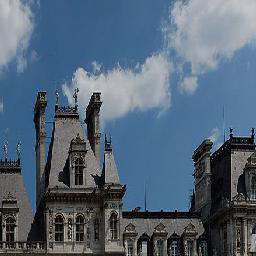

In [8]:
square = 256
left = square + (square/2)
top = 0 
right = left + square
bottom = top + square
Image.open(train_img[0]).crop((left, top, right, bottom))

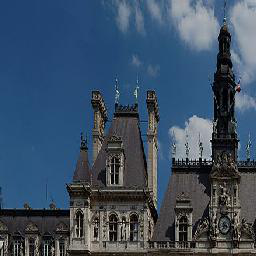

In [9]:
square = 256
left = 0 + (square/2)
top = 0 
right = left + square
bottom = top + square
Image.open(train_img[0]).crop((left, top, right, bottom))

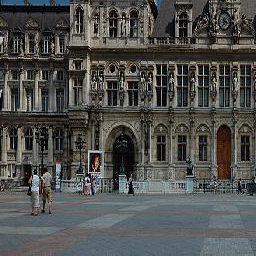

In [11]:
square = 256
left = 0 + (square/2)
top = 460-256 
right = left + square
bottom = top + square
Image.open(train_img[0]).crop((left, top, right, bottom))

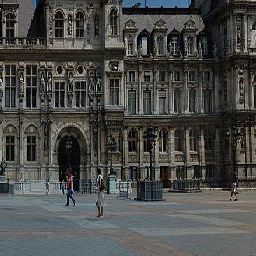

In [12]:
square = 256
left = square + (square/2)
top = 460-256 
right = left + square
bottom = top + square
Image.open(train_img[0]).crop((left, top, right, bottom))

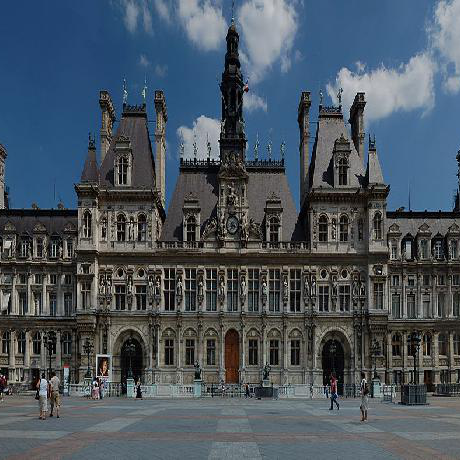

In [66]:
square = 460
left = (width - square)/2
top = (height - square)/2
right = (width + square)/2
bottom = (height + square)/2

Image.open(train_img[0]).crop((left, top, right, bottom))

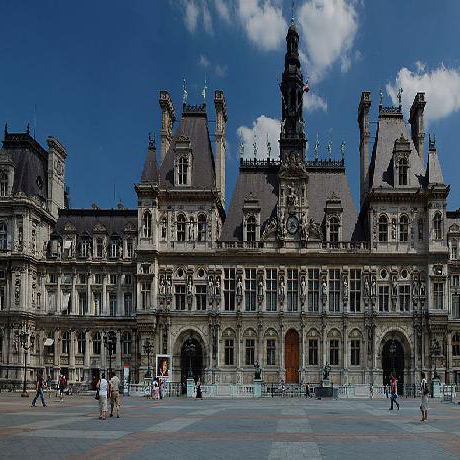

In [49]:
Image.open(train_img[0]).crop((60, 0, height+60, height))

In [ ]:
Image.open(train_img[0]).crop((60, 0, height+60, height))

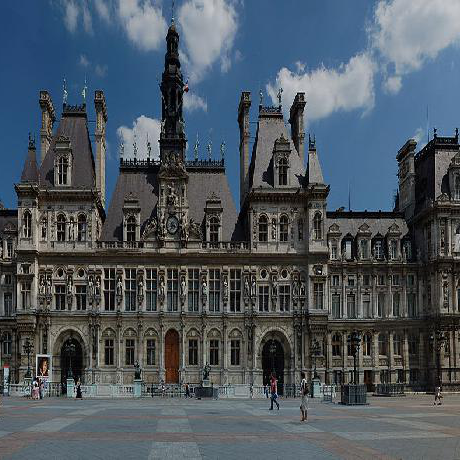

In [52]:
Image.open(train_img[0]).crop((width-height-60, 0, width-60, height))

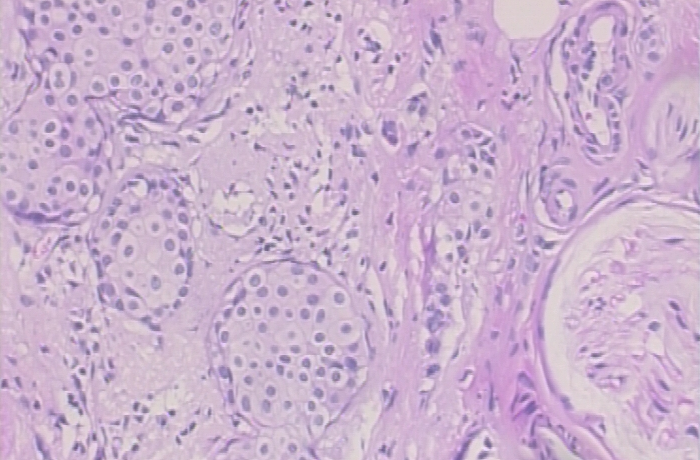

In [60]:
width, height = Image.open(train_img[0]).size
Image.open(train_img[0])

In [16]:
np.expand_dims(np.array(image), axis=0).shape

(1, 460, 700, 3)

In [2]:
train_img = shuffle(glob.glob("data/original/all/*"))[0]

In [3]:
image = Image.open(train_img)
img1 = image.crop((0+0, 0, 460+0, 460)).resize((256,256))
img2 = image.crop((120, 0, 580, 460)).resize((256,256))
img3 = image.crop((240-0, 0, 700-0, 460)).resize((256,256))

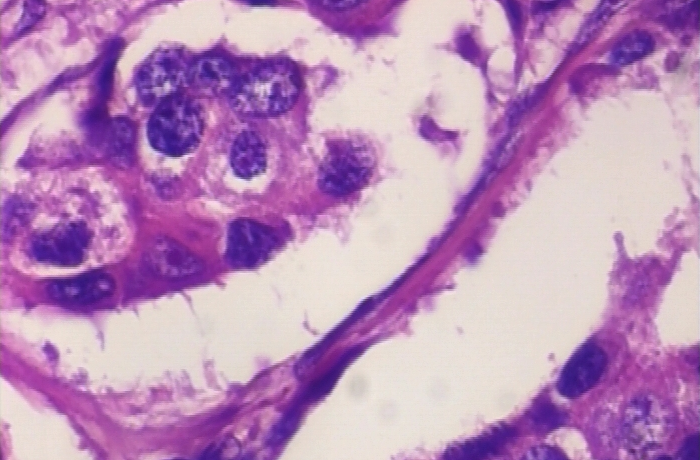

In [94]:
image

(-0.5, 255.5, 255.5, -0.5)

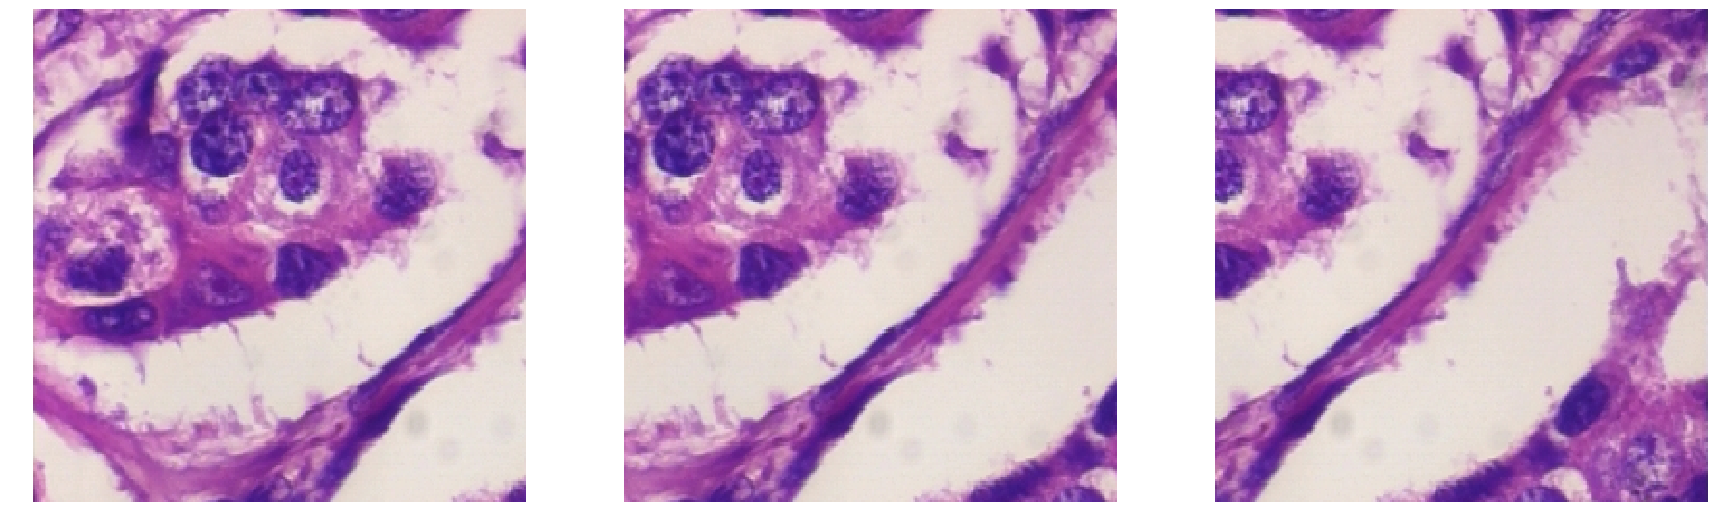

In [95]:
f, ax = plt.subplots(1, 3)
f.set_size_inches(30, 25)

ax[0].imshow(img1, cmap='jet')
ax[0].axis('off')

ax[1].imshow(img2, cmap='jet')
ax[1].axis('off')

ax[2].imshow(img3, cmap='jet')
ax[2].axis('off')

In [7]:
image = Image.open(train_img[0])

In [9]:
width, height = image.size

In [25]:
new_width = 460
new_height = 460

In [27]:
left = (width - new_width)/2
top = (height - new_height)/2
right = (width + new_width)/2
bottom = (height + new_height)/2

In [42]:
# image.crop((left, top, right, bottom))

In [ ]:
# im.crop((left, top, right, bottom))

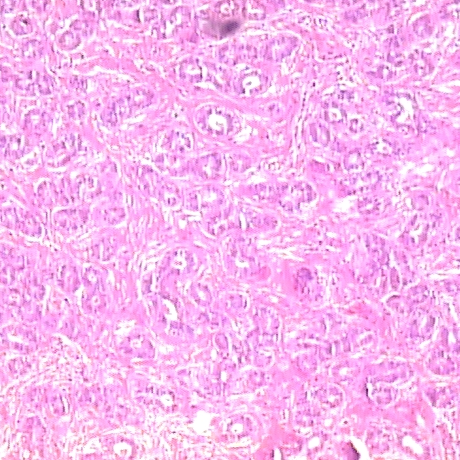

In [31]:
image.crop((width-height, 0, width, height))

In [ ]:
left = (width - new_width)/2
top = (height - new_height)/2
right = (width + new_width)/2
bottom = (height + new_height)/2

im.crop((left, top, right, bottom))